# Importing necessary ML modules



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CVS file

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/Earthquake prediction project/database.csv")

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Choosing only the necessary features

In [4]:
data = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude','Root Mean Square','Status']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,NaN,Automatic
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,NaN,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,NaN,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,NaN,Automatic
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,NaN,Automatic


# Data Preprocessing


In [5]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Depth                  0
Magnitude              0
Root Mean Square    6060
Status                 0
dtype: int64

Filling the missing values of column 'Root Mean Square'

In [6]:
# Fill empty values in the 'Root Mean Square' column with the mean of the column
data.loc[:, 'Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())
# Drop any remaining rows with NaN values and reset the index
data = data.dropna(axis=0).reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10968\2029880196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())


In [7]:
data.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Depth               0
Magnitude           0
Root Mean Square    0
Status              0
dtype: int64

In [8]:
data

,Date,Time,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0,1.022784,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8,1.022784,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2,1.022784,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8,1.022784,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8,1.022784,Automatic
...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,0.189800,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,0.218700,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,1.520000,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,1.430000,Reviewed


# Data Visualization

In [9]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']
correlation = data[numeric_columns].corr()

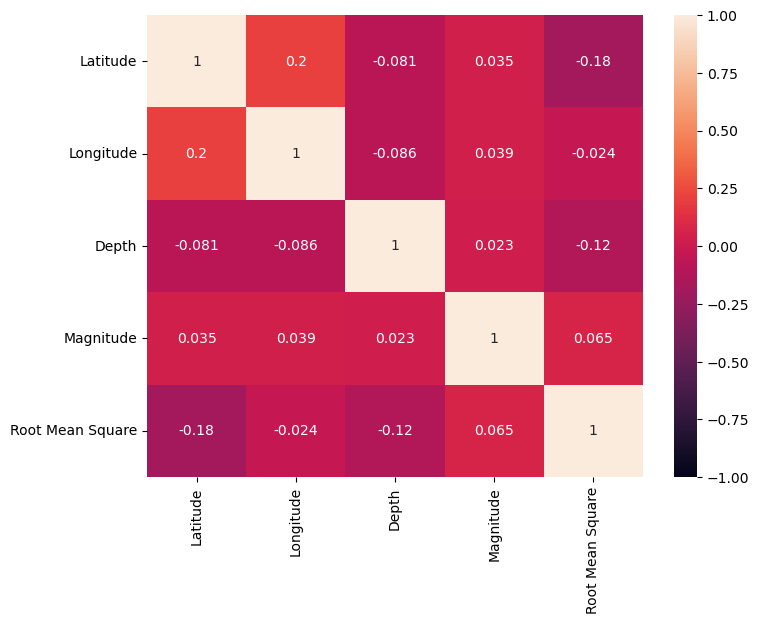

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)

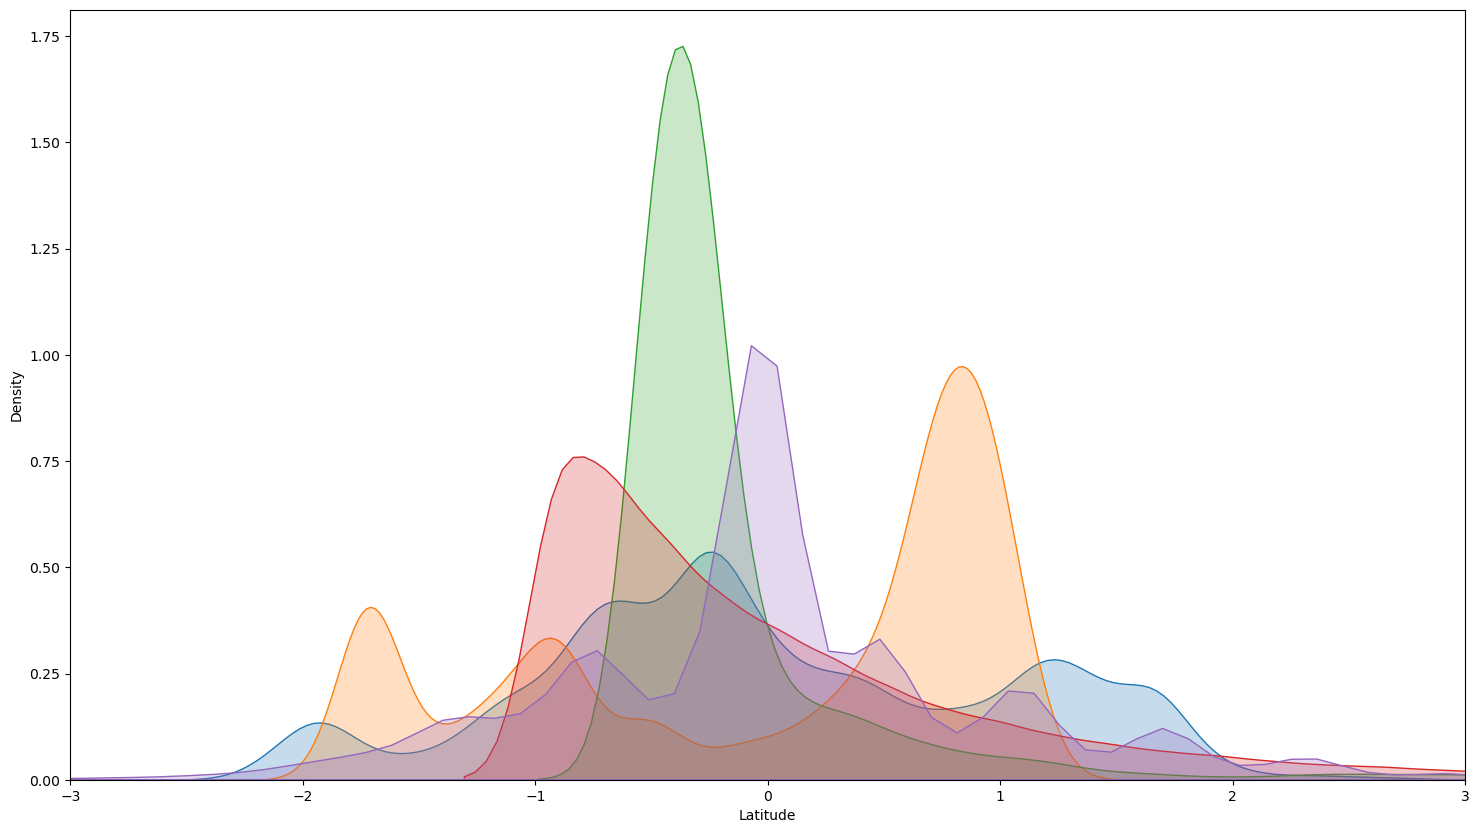

In [12]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True)
plt.xlim(-3, 3)
plt.show()

# Training and Testing

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Handle other non-numeric columns if any 
data = pd.get_dummies(data)

# Separate the target variable
y = data['Magnitude']
X = data.drop('Magnitude', axis=1)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize Decision Tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')


Training Mean Squared Error: 0.00
Testing Mean Squared Error: 0.25


In [15]:
import joblib
import os
# Save the model to a folder named 'Model'
if not os.path.exists('Model'):
    os.makedirs('Model')

model_path = 'Model/model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at Model/model.pkl
